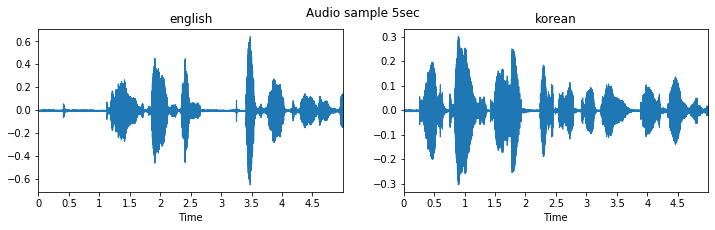

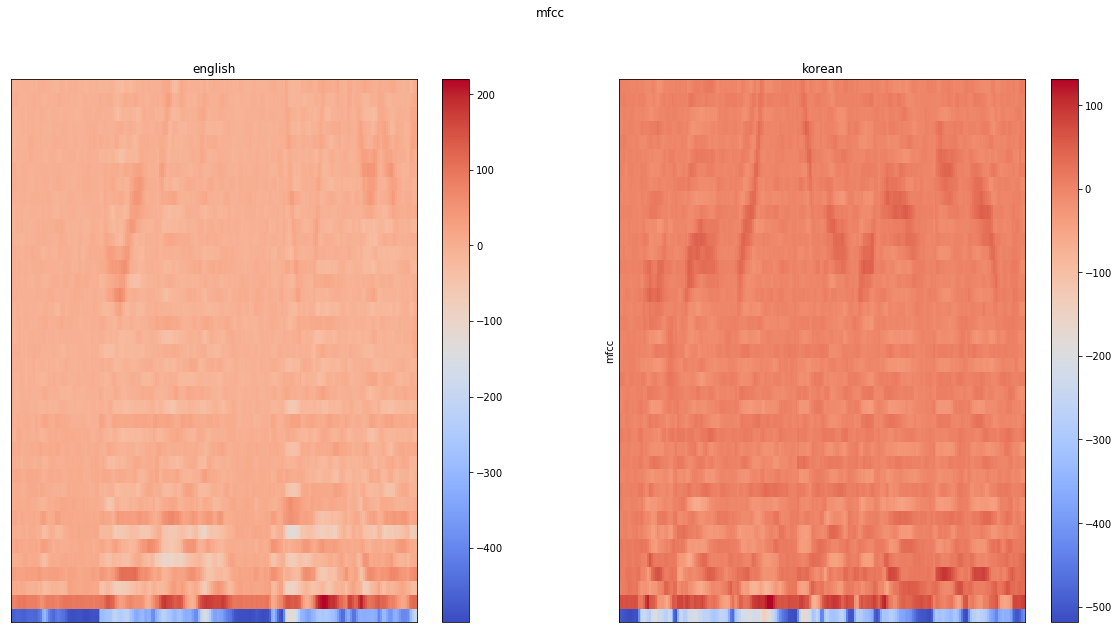

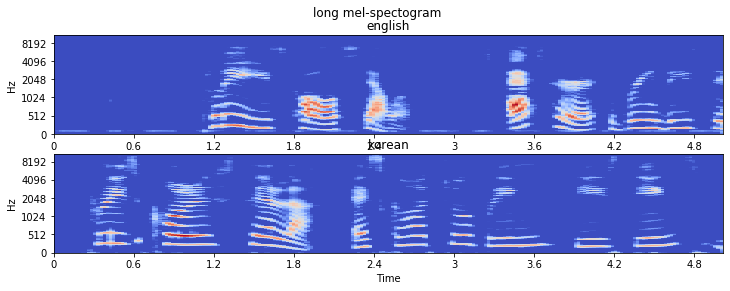

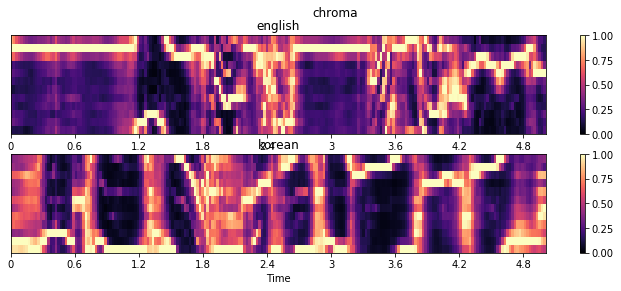

In [45]:
import pandas as pd
import os
import math
import numpy as np
import matplotlib.pyplot as plt  
import IPython.display as ipd  # To play sound in the notebook
import librosa
import librosa.display
import warnings
warnings.filterwarnings('ignore')

SAMPLE_RATE = 22050
duration = 5 # sec
n_mfcc = 39 # number of mfcc features
n_mels = 128 # number of log mel-spectogram features

fname_f_en = 'recordings/' + 'english385.mp3'
fname_f_ko = 'recordings/' + 'korean30.mp3'
# english speaker
y_en, sr = librosa.load(fname_f_en, sr= SAMPLE_RATE, duration = duration)
mfcc_en = librosa.feature.mfcc(y = y_en, sr = SAMPLE_RATE, n_mfcc = n_mfcc)
melspec_en = librosa.feature.melspectrogram(y_en, sr, n_mels = n_mels)
log_S_en = librosa.amplitude_to_db(melspec_en)
C_en = librosa.feature.chroma_cqt(y=y_en, sr=sr)

# korean speaker
y_ko, sr = librosa.load(fname_f_ko, sr= SAMPLE_RATE, duration = duration)
mfcc_ko = librosa.feature.mfcc(y = y_ko, sr = SAMPLE_RATE, n_mfcc = n_mfcc)
melspec_ko = librosa.feature.melspectrogram(y_ko, sr, n_mels = n_mels)
log_S_ko = librosa.amplitude_to_db(melspec_ko)
C_ko = librosa.feature.chroma_cqt(y=y_ko, sr=sr)

# raw audio
plt.figure(figsize= (12,3))
plt.subplot(1,2,1)
plt.suptitle('Audio sample 5sec')
librosa.display.waveplot(y_en, sr=sr)
plt.title('english')

plt.subplot(1,2,2)
librosa.display.waveplot(y_ko, sr=sr)
plt.title('korean')

# mfcc
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
librosa.display.specshow(mfcc_en)
plt.suptitle('mfcc')
plt.title('english')
plt.colorbar()

plt.subplot(1,2,2)
librosa.display.specshow(mfcc_ko)
plt.ylabel('mfcc')
plt.title('korean')
plt.colorbar()

# long mel-spectogram
plt.figure(figsize=(12,4))
plt.subplot(2,1,1)
plt.suptitle('long mel-spectogram')
librosa.display.specshow(log_S_en, sr=sr, x_axis = 'time', y_axis = 'mel')
plt.title('english')

plt.subplot(2,1,2)
librosa.display.specshow(log_S_ko, sr=sr, x_axis = 'time', y_axis = 'mel')
plt.title('korean')

# chroma
plt.figure(figsize=(12,4))
plt.subplot(2,1,1)
plt.suptitle('chroma')
librosa.display.specshow(C_en, sr=sr, x_axis ='time', vmin=0, vmax =1)
plt.title('english')
plt.colorbar()

plt.subplot(2,1,2)
librosa.display.specshow(C_ko, sr=sr, x_axis ='time', vmin=0, vmax =1)
plt.title('korean')
plt.colorbar()


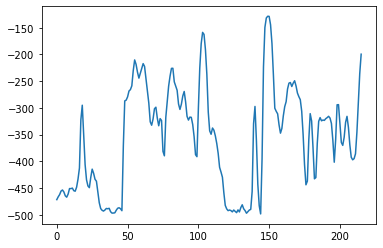